## Rede Neural utilizando TensorFlow

- Classificação de iris.
- Carregando e separando os dados, em 80% para treino e 20% para teste, 10% dos 80% vão para validação.


In [ ]:
# Instalação das bibliotecas necessárias
!pip install numpy>=1.23.3 scikit-learn>=1.1.2 matplotlib>=3.6.0 pydot>=1.4.2 jupyterlab>=3.4.8 tensorflow>=2.10.0

In [18]:
# imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Preparando os dados

In [2]:
# Dataset Iris
from sklearn.datasets import load_iris
input_data = load_iris()

# Principio do Aprendizado de Maquina Supervisionado
data = input_data['data']
classe = input_data['target']

data_treino, data_teste, classe_treino, classe_teste = train_test_split(data,classe,test_size=0.2, random_state=123)

classe_treino_onehot = to_categorical(classe_treino)

## Criando a rede neural

In [3]:
def create_model(numInput,numClasses):
  model = Sequential()

  model.add(Dense(numInput,activation='tanh', input_dim=numInput))  # Camada de entrada
  model.add(Dense(14,activation='tanh'))                            # Camada oculta
  model.add(Dense(numClasses,activation='softmax'))                 # Camada de saída

  model.compile('Adam','categorical_crossentropy', metrics=['categorical_accuracy'])

  return model

# Criando o modelo
model = create_model(4,3)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Treinando o modelo
history = model.fit(data_treino,          # Dados para treino
                    classe_treino_onehot, # Label dos dados
                    epochs=200,           # Número de épocas
                    validation_split=0.1) # Separa 10% para validação

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - categorical_accuracy: 0.7069 - loss: 0.9624 - val_categorical_accuracy: 0.5000 - val_loss: 1.1222
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - categorical_accuracy: 0.7038 - loss: 0.9455 - val_categorical_accuracy: 0.5000 - val_loss: 1.0941
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.7049 - loss: 0.9307 - val_categorical_accuracy: 0.5000 - val_loss: 1.0682
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.7017 - loss: 0.9168 - val_categorical_accuracy: 0.5000 - val_loss: 1.0443
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.7049 - loss: 0.9012 - val_categorical_accuracy: 0.5000 - val_loss: 1.0225
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.7184 - loss: 0.8828 - val_categorical_accuracy: 0.5000 - val_loss: 1.0056
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6663 - loss: 0.8924 - v

## Modelo da rede neural

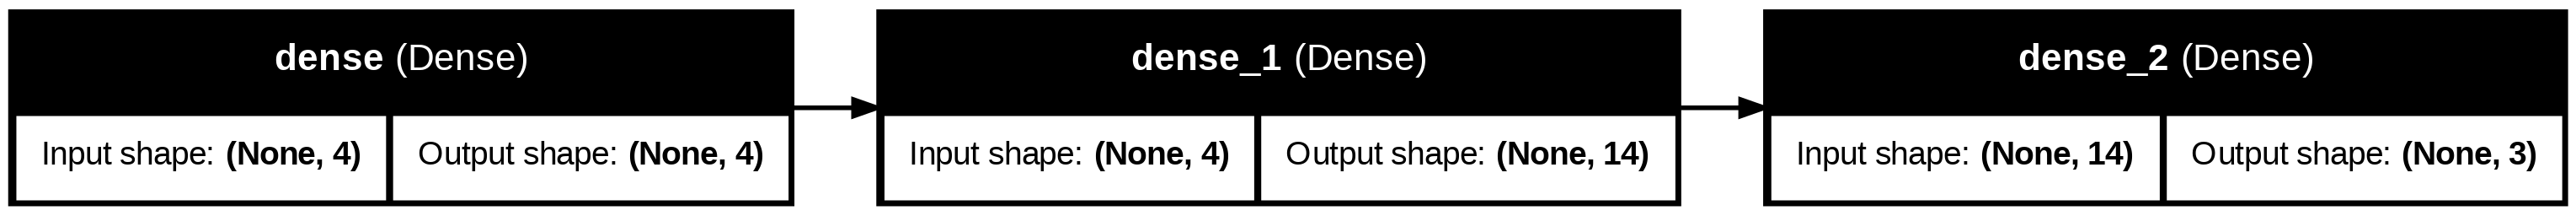

In [5]:
# Exibindo o modelo criado
plot_model(model,
           show_shapes=True,                  # Manter: Mostra as formas de entrada/saída
           show_layer_names=True,             # Sugestão: Mostra os nomes das camadas para identificação
           rankdir='LR',                      # Manter: Direção do layout Esquerda-Direita
           dpi=200,                           # Sugestão: Aumentar DPI para melhor nitidez
           expand_nested=True)                # Sugestão: Expande modelos aninhados, se houver

## Gráficos

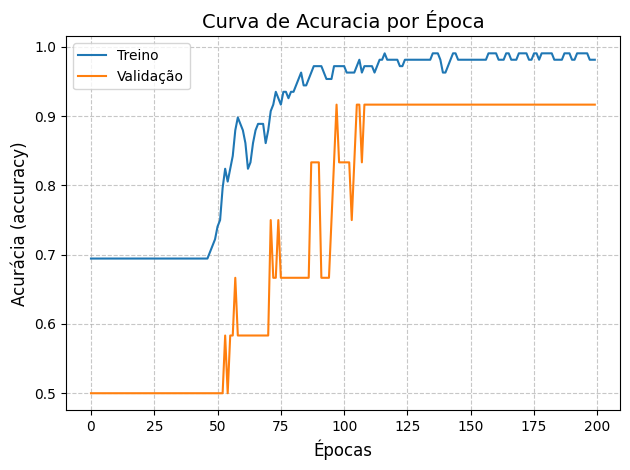

In [30]:
# Criando os graficos
plt.plot(history.history['categorical_accuracy'], label='Treino')
plt.plot(history.history['val_categorical_accuracy'], label='Validação')

# Adicionando título e rótulos aos eixos
plt.title('Curva de Acurácia por Época', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Acurácia (accuracy)', fontsize=12)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionando grade
plt.tight_layout()  # Ajuste para não cortar o gráfico
plt.show()

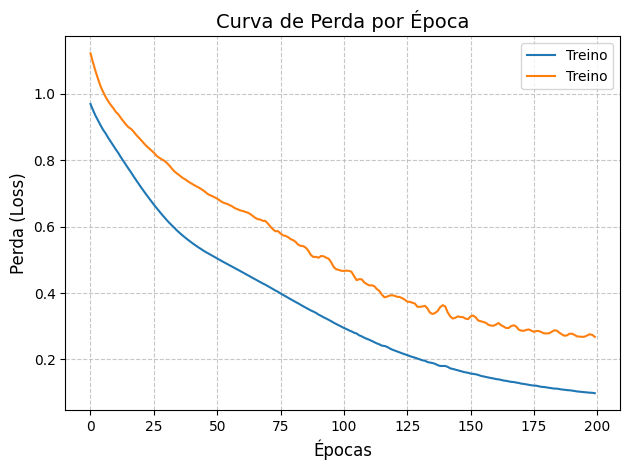

In [33]:
# Criando os graficos
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Treino')

# Adicionando título e rótulos aos eixos
plt.title('Curva de Perda por Época', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Perda (Loss)', fontsize=12)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionando grade
plt.tight_layout()  # Ajuste para não cortar o gráfico
plt.show()

## Testando a rede neural
> Usaremos o resultado para a matriz de confusão e nossas métricas

In [7]:
classe_predita_onehot = model.predict(data_teste)
classe_predita = classe_predita_onehot.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


## Matriz de confusão
> https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509

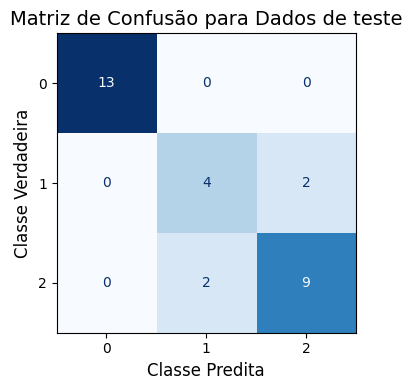

In [21]:
# Montando a matriz
cm = confusion_matrix(classe_teste, classe_predita, labels=range(3))

# Exibindo a matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)

# Melhorando o gráfico
ax.set_title('Matriz de Confusão para Dados de teste', fontsize=14)
ax.set_xlabel('Classe Predita', fontsize=12)
ax.set_ylabel('Classe Verdadeira', fontsize=12)

plt.tight_layout()
plt.show()

## Métricas
> https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [23]:
print(classification_report(classe_teste, classe_predita, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.67      0.67      0.67         6
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.87      0.87      0.87        30

